170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5770 - accuracy: 0.4222 - val_loss: 1.3198 - val_accuracy: 0.5222
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2305 - accuracy: 0.5642 - val_loss: 1.1132 - val_accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0706 - accuracy: 0.6213 - val_loss: 1.1399 - val_accuracy: 0.5972
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9716 - accuracy: 0.6578 - val_loss: 1.0030 - val_accuracy: 0.6504
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8949 - accuracy: 0.6829 - val_loss: 1.0480 - val_accuracy: 0.6336
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8423 - accuracy: 0.7046 - val_loss: 0.9344 - val_accuracy: 0.6727
Epoch 7/10
1563/1563 [==============================] - 6

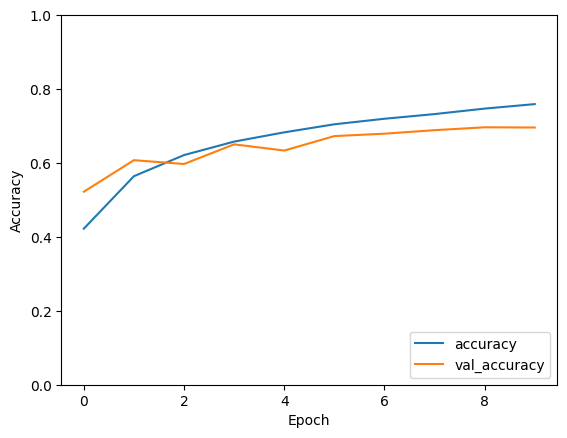

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # 10 output classes

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
